# Plot the simple log

In [8]:
%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

In [9]:
data = pd.read_excel("https://github.com/mendip-defender/Voltage-Data-Logging/raw/refs/heads/main/data/combined_data_all_time.xlsx")
data

,Time Stamp,Mean Value,Standard Deviation,Standard Deviation Mean,µV/V of Standard Deviation Mean,n of readings,Uncertainty
0,2024-06-08 16:27:43.538,10.000067,NaN,NaN,NaN,NaN,NaN
1,2024-06-08 16:27:47.637,10.000067,NaN,NaN,NaN,NaN,NaN
2,2024-06-08 16:27:51.731,10.000068,NaN,NaN,NaN,NaN,NaN
3,2024-06-08 16:27:55.810,10.000068,NaN,NaN,NaN,NaN,NaN
4,2024-06-08 16:27:59.905,10.000068,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
287241,2025-09-10 18:51:27.999,10.000089,0.000001,0.0,0.02,20.0,0.00018
287242,2025-09-10 18:53:36.354,10.000089,0.000001,0.0,0.02,20.0,0.00018
287243,2025-09-10 18:55:44.702,10.000089,0.000001,0.0,0.01,20.0,0.00018
287244,2025-09-10 18:57:53.197,10.000089,0.000001,0.0,0.02,20.0,0.00018


In [10]:
#lets write a litle helper function to calculate the deviation in ppm referenced to the mean
def ppm(arr):
    return (arr - np.mean(arr))/np.mean(arr) * 1e6
def stan_dev_ppm(arr):
    return arr
def v_read(arr):
    return (arr - 10)*1000*1000
def ppm_UoM(frame):
    return round(frame["Uncertainty"] / frame["Mean Value"] * 1e6, 2)

In [11]:
#hmm = round((0.00018/10.000065) * 1e6, 2)
#hmm = v_read_UoM(data["Uncertainty"])
#print(hmm)

#def fun(frame):
#    return frame["Uncertainty"] / frame["Mean Value"] * 1e6

#print(fun(data))

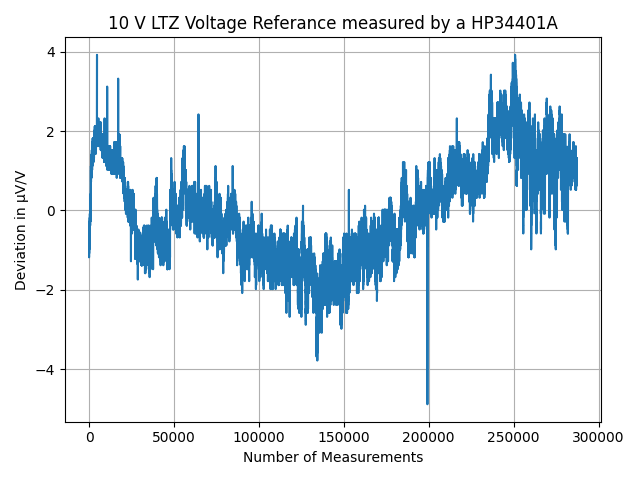

In [12]:
plt.figure()
plt.title("10 V LTZ Voltage Referance measured by a HP34401A")
plt.plot(ppm(data["Mean Value"]))
#plt.errorbar(data.index, ppm(data["Mean Value"]), yerr=ppm_UoM(data))
plt.ylabel("Deviation in µV/V")
plt.xlabel("Number of Measurements")
plt.grid()
#plt.figure(figsize=(15,6))
plt.tight_layout()
plt.show()

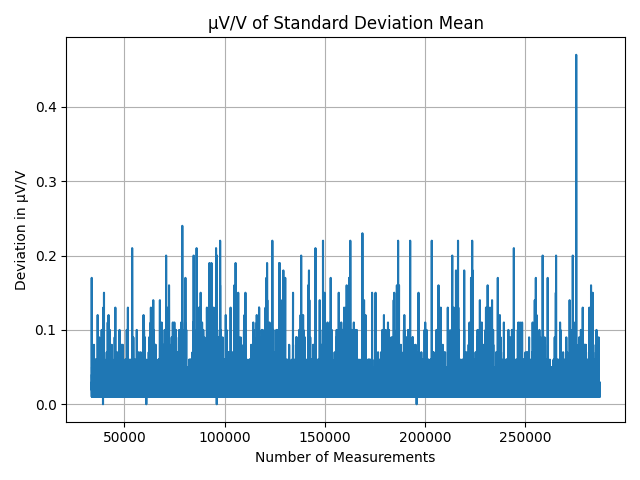

In [13]:
plt.figure()
plt.title("µV/V of Standard Deviation Mean")
plt.plot(stan_dev_ppm(data["µV/V of Standard Deviation Mean"]))
#plt.errorbar(ppm, yerr=16)
plt.ylabel("Deviation in µV/V")
plt.xlabel("Number of Measurements")
#plt.figure(figsize=(15,6))
plt.grid()
plt.tight_layout()
plt.show()

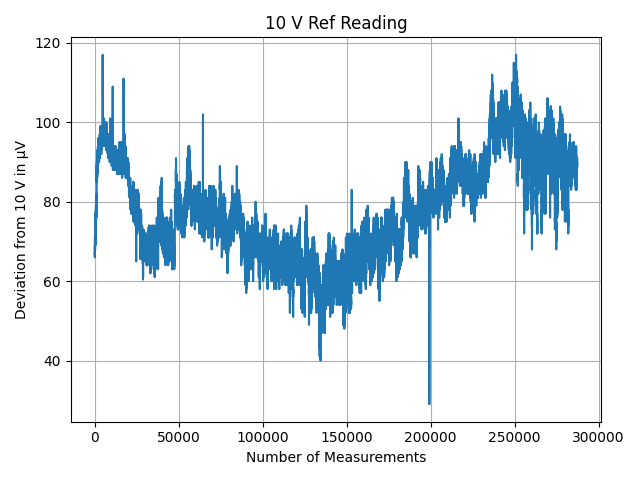

In [14]:
plt.figure()
plt.title("10 V Ref Reading")
plt.plot(v_read(data["Mean Value"]))
#plt.errorbar(v_read, yerr=16, fmt='o')
plt.ylabel("Deviation from 10 V in µV")
plt.xlabel("Number of Measurements")
#plt.figure(figsize=(15,6))
plt.grid()
plt.tight_layout()
plt.show()